# Continuum'24 Fractal

![Continuum'24 Banner](./ContinuumBanner.svg)

This is the source to generate the "Tree-like fractal" in the above logo.

In [1]:
from math import sin, cos, pi
import matplotlib.pyplot as plt

In [2]:
def twoBranchTreeFractal(depth, angle, lengthFactor) -> list[tuple[complex, complex]]:
    """
    This function generates the lists of tuples(complex, complex) which defines each line of the tree.
    ## ARGS
    [int]   `depth`         : Number of steps in fractal
    [float] `angle`         : Angle (in radians) between each branch at every node
    [float] `lengthFactor`  : The factor by which the lenght get's multiplied every step. Good humans keep it below 1!
    ## RETURNS
    List[Tuple[Complex, Complex]] with length of list being `2^depth - 1`
    """
    lineTree = [(
        0j,
        -1 + 0j
    )]
    leftRotChild = lengthFactor * complex(cos(-angle / 2), sin(-angle / 2))
    rightRotChild = lengthFactor * complex(cos( angle / 2), sin( angle / 2))

    for n in range(1, depth):
        for parentIndex in range(2**(n-1) - 1, 2**n - 1):
            parent = lineTree[parentIndex]
            leftChild = (
                parent[1],
                (parent[1] - parent[0]) * leftRotChild + parent[1]
            )
            rightChild = (
                parent[1],
                (parent[1] - parent[0]) * rightRotChild + parent[1]
            )
            lineTree.append(
                leftChild
            )
            lineTree.append(
                rightChild
            )
    return lineTree

## Usage

Let us learn how to use the output of this function to get the lines. For `depth=3` there would be 1+2+4=7 lines. First being the longest, next 2 being child of first and next four being child of previous two. Here is demonstration of how to plot it!

In [3]:
tree = twoBranchTreeFractal(
    depth = 3,
    angle = pi/2,
    lengthFactor = .5
)

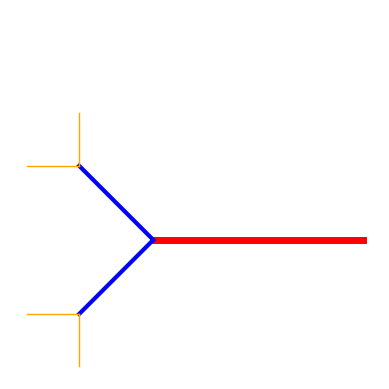

In [4]:
# First iteration
p1, p2 = tree[0]
plt.plot((p1.real, p2.real),   # x1, x2
         (p1.imag, p2.imag),   # y1, y2
        color = 'red', linewidth = 5
)

# Second iteration
for i in [1, 2]:
    p1, p2 = tree[i]
    plt.plot((p1.real, p2.real),   # x1, x2
             (p1.imag, p2.imag),   # y1, y2
            color = 'blue', linewidth = 3
    )

# Third iteration
for i in [3, 4, 5, 6]:
    p1, p2 = tree[i]
    plt.plot((p1.real, p2.real),   # x1, x2
             (p1.imag, p2.imag),   # y1, y2
            color = 'orange', linewidth = 1
    )

plt.axis('square')  # Making square grid
plt.axis('off');    # Removing Axis lines

## Generating exact pattern

Below are the exact parameters which were used to make the logo.

In [5]:
tree = twoBranchTreeFractal(
    depth = 11, # Depth of the fractal
    angle = 1, # radians
    lengthFactor = .75 # Relative to previous
)

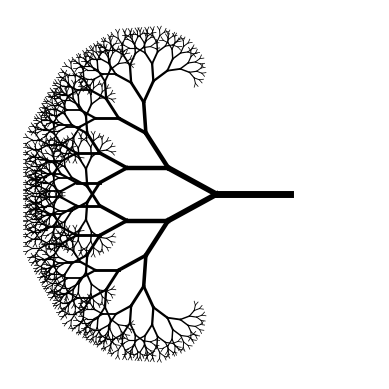

In [6]:
for n in range(11):
    node = tree[2**n -1]
    t = 5 * (.8) ** n
    plot_data = []
    for node in tree[2**n - 1 : 2**(n+1) -1]:
        plot_data.append((node[0].real, node[1].real))
        plot_data.append((node[0].imag, node[1].imag))
    plt.plot(
        *plot_data, color = 'black', linewidth = t
    )

plt.axis('square')
plt.axis('off')
plt.savefig('treeFractal.svg');